## Preprocessing Notebook

---

This notebook is used to preprocess the data before training the model. Since we are dealing with RAW audio, the preprocessing steps are as follows:

1. [Set the paths](#set-the-paths)
2. [Check the presence of corrupted files](#check-the-presence-of-corrupted-files)
3. [Structure the data in a proper way to standardize feature extraction](#structure-the-data)
4. [Resample the audio files to a common sampling rate (if needed)](#resample-the-audio-files)


In [1]:
# needed packages
# %pip install tqdm torch torchaudio ipywidgets shutils

# import all the functions
from utils import *
import pandas as pd
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

# -------- tqdm DARK THEME --------

### 1. Set the paths


In [3]:
# hyperparameters
sr = 4000
# sr = ''

# set the paths
BASE_DIR = "../dataset/"
FULL_DATA_DIR = BASE_DIR + "audio/"
CORRUPTED_DIR = BASE_DIR + f"audio/corrupted_{sr}/"
METADATA = BASE_DIR + "metadata.csv"
ANNOTATION = BASE_DIR + "annotation.csv"
LABELS = BASE_DIR + "labels.csv"

# paths of restrucutred data
ARTIFACTS_DIR = BASE_DIR + f"artifacts_{sr}/"
EXTRAHLS_DIR = BASE_DIR + f"extrahls_{sr}/"
MURMURS_DIR = BASE_DIR + f"murmurs_{sr}/"
NORMALS_DIR = BASE_DIR + f"normals_{sr}/"
EXTRASTOLES_DIR = BASE_DIR + f"extrastoles_{sr}/"

DIRS = [ARTIFACTS_DIR, EXTRAHLS_DIR, MURMURS_DIR, NORMALS_DIR, EXTRASTOLES_DIR]

### 2. Check the presence of corrupted files


In [4]:
count, names = move_corrupted_files(FULL_DATA_DIR, CORRUPTED_DIR)

Checking files:   0%|          | 0/663 [00:00<?, ?it/s]

mv: cannot move '../dataset/audio/corrupted_4000' to a subdirectory of itself, '../dataset/audio/corrupted_4000/corrupted_4000'


File corrupted_4000 is corrupted
File corrupted is corrupted
Files corrupted in ../dataset/audio/:	2



### 3. Structure the data


In [5]:
metadata = pd.read_csv(METADATA)
annotation = pd.read_csv(ANNOTATION)
labels = pd.read_csv(LABELS)
audio_info = pd.merge(metadata, labels, on="filename")

unique_labels = pd.unique(labels["label"])
print(unique_labels)

['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


In [6]:
# create a directory for each label and copy the files
for i, label in enumerate(unique_labels):
    audio_info_filt = audio_info[audio_info["label"] == label]["filename"]
    names_list = audio_info_filt.to_list()

    # create the directories
    os.makedirs(DIRS[i], exist_ok=True)

    # copy the files
    for name in names_list:
        shutil.copy(FULL_DATA_DIR + name, DIRS[i] + name)

### 4. Resample the audio files


In [7]:
for DIR in DIRS:
    check_resample_sample_rate(target_freq=sr, src_dir=DIR, overwrite=True)

  0%|          | 0/92 [00:00<?, ?it/s]

Resampling artifact__201106031558.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106041452.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_45.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact__201106161019.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106220340.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_18.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact__201106040933.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106070537.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201105040918.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201105051017.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201105041959.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_17.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_23.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact_202

  0%|          | 0/19 [00:00<?, ?it/s]

Resampling extrahls__201102241217.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201104270458.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101241433.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201103150114.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201103182227.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201102071835.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201102070251.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101161027.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101091153.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101160808.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201103170134.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101152255.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101241423.wav from 44100 Hz to 4000 Hz...
Completed.

  0%|          | 0/149 [00:00<?, ?it/s]

Resampling murmur__201108222243.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling abnormal_s3_2023_18.wav from 11025 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222237.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222258.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling diastolic_rumble_2023_11.wav from 11025 Hz to 4000 Hz...
Completed.
Resampling innocent_murmur_2023_8.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222238.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling atrial_septal_defect_2023_6.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222221.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201104021355.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222248.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling mitral_valve_prolapse_2023_10.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222235.wav from 44100 Hz to 4000 Hz...
Completed.
Resa

  0%|          | 0/355 [00:00<?, ?it/s]

Resampling normal__201106151236.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201105151450.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201102270940.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201102201230.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201103140132.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201103090635.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201102260502.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201106210943.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201108011115.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201106141148.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201103140822.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal_2023_3.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201102081152.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201104122156.

  0%|          | 0/46 [00:00<?, ?it/s]

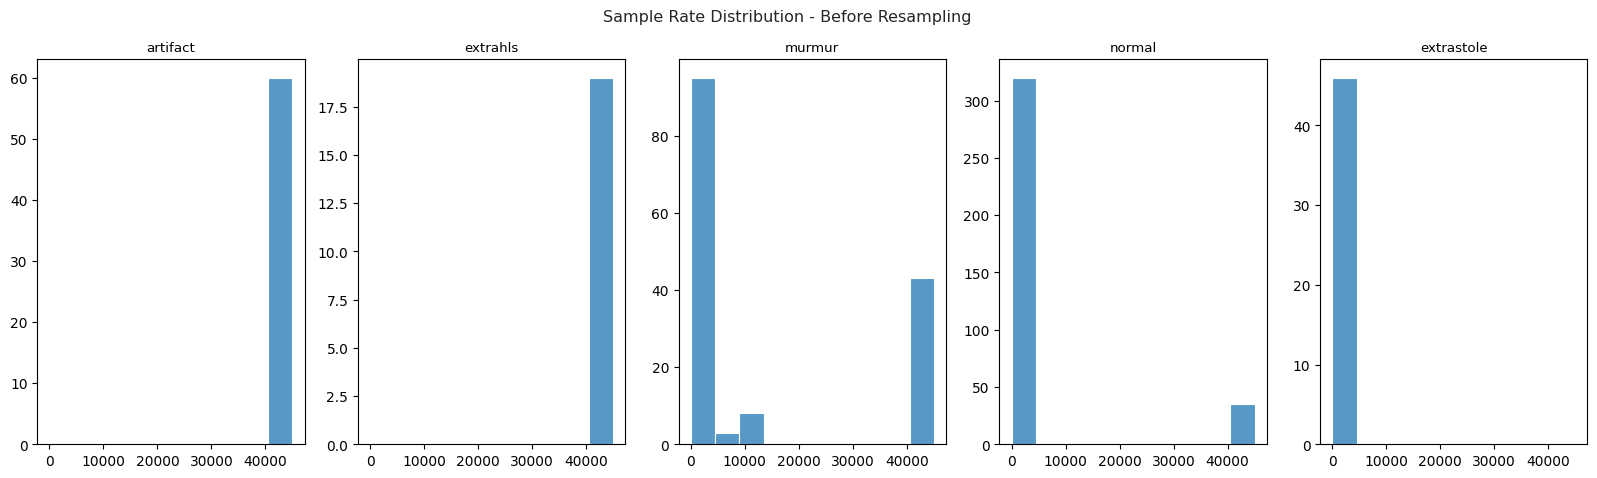

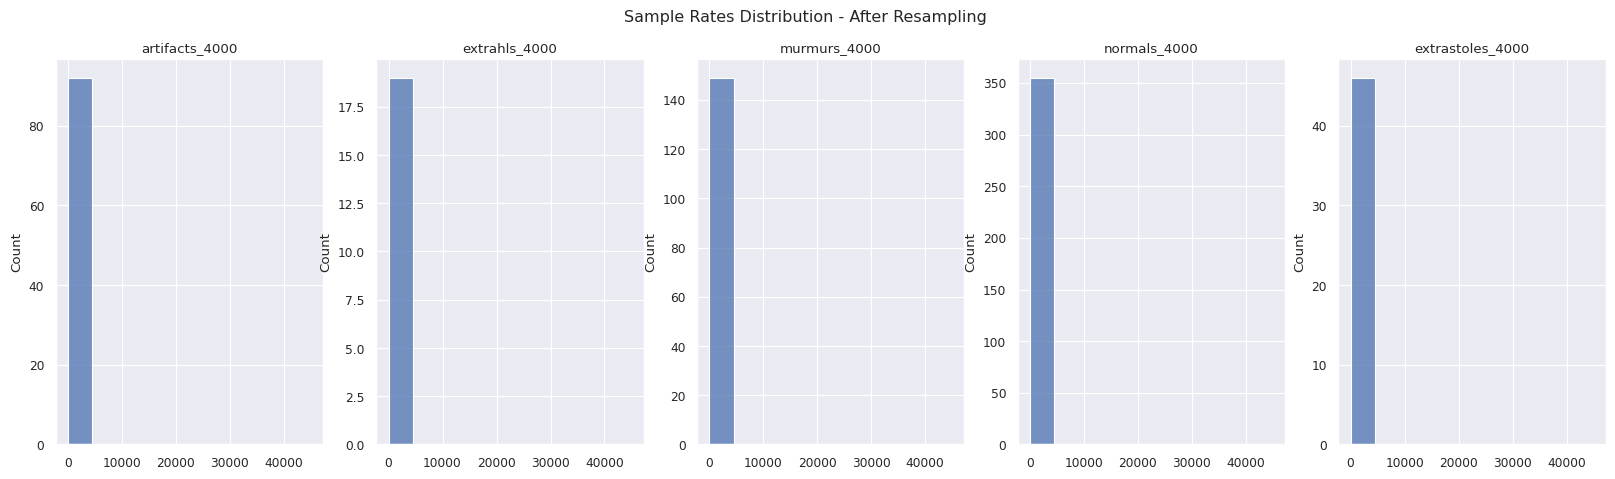

In [8]:
# check the sample rate distribution for each class

unique_labels = audio_info["label"].unique()
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
sns.set_theme(context="paper", font_scale=1)
for i, label in enumerate(unique_labels):
    audio_info_tmp = audio_info[audio_info["label"] == label]
    sns.histplot(audio_info_tmp["sample_rate"], ax=axs[i], bins=10, binrange=(0, 45000))
    axs[i].set_title(label)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    fig.suptitle("Sample Rate Distribution - Before Resampling")


# check the sample rates distribution
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for DIR in DIRS:
    srs = []
    files = os.listdir(DIR)
    for file in files:
        meta = torchaudio.info(DIR + file)
        srs.append(meta.sample_rate)
    sns.histplot(srs, ax=axs[DIRS.index(DIR)], bins=10, binrange=(0, 45000))
    axs[DIRS.index(DIR)].set_title(DIR.split("/")[-2])
fig.suptitle("Sample Rates Distribution - After Resampling")
plt.show()